In [14]:
# Importing the libraries
import numpy as np
import pandas as pd
import re
import pickle 
import nltk
#import heapq
from sklearn.datasets import load_files
import csv
import matplotlib.pyplot as plt
import itertools
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn import metrics
stop_words = set(stopwords.words('english')) 
#from gensim.models import Word2Vec

In [15]:
Data=pd.read_excel('NewsData.xlsx')

X=Data.iloc[:,0].values
y=Data.iloc[:,1].values

corpus_sent = []
for i in range(0,len(X)):
    text = re.sub(r'\W',' ',str(X[i]))
    text = re.sub("@[\w\d]+", "", text)           #delete any references to other people
    text = re.sub("http:[\w\:\/\.]+","", text)    #replace url's
    text = re.sub('[^[A-Za-z]\s]','', text)      #replace non alphabets and non spaces
    text=  re.sub('[^a-zA-Z]',' ', text)         #remoce non words (special characters)
    text = re.sub('[^\w\s]','', text)            #remove white spaces
    text = text.lower()
    words = nltk.tokenize.word_tokenize(text)
    tokens =' '.join([word for word in words if not text in stop_words])
    corpus_sent.append(tokens)
    

lem = WordNetLemmatizer()

# word tokenization
for i in range(len(corpus_sent)):
    words = nltk.word_tokenize(corpus_sent[i])
    stm_word = [lem.lemmatize(word) for word in words]
    corpus_sent[i] = ' '.join(stm_word)

In [16]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = None)
X = vectorizer.fit_transform(corpus_sent).toarray()

In [17]:
# Splitting the dataset into the Training set and Test set
y=y.astype('int')

from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

# Testing model performance
lr_pred = classifier.predict(text_test)

c:\users\khair\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\khair\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
cm = confusion_matrix(sent_test, lr_pred)
print (cm)  

[[ 55  91]
 [ 12 442]]


In [20]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(sent_test,lr_pred)
lr_f1 = f1_score(sent_test,lr_pred)
lr_precision = precision_score(sent_test,lr_pred)
lr_recall = recall_score(sent_test,lr_pred)
print(lr_accuracy*100)
print(lr_f1*100)
print(lr_precision*100)
print(lr_recall*100)

82.83333333333334
89.56433637284701
82.92682926829268
97.3568281938326


In [21]:
# svm
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(text_train, sent_train)
# Testing model performance
svm_pred = clf_output.predict(text_test)

In [22]:
svm_accuracy = accuracy_score(sent_test,svm_pred)
svm_f1 = f1_score(sent_test,svm_pred)
svm_precision = precision_score(sent_test,svm_pred)
svm_recall = recall_score(sent_test,svm_pred)
print(svm_accuracy*100)
print(svm_f1*100)
print(svm_precision*100)
print(svm_recall*100)

92.0
94.59459459459458
96.7741935483871
92.51101321585902


In [23]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb = nb.fit(text_train, sent_train)

nb_pred = nb.predict(text_test)

In [24]:
nb_accuracy = accuracy_score(sent_test,nb_pred)
nb_f1 = f1_score(sent_test,nb_pred)
nb_precision = precision_score(sent_test,nb_pred)
nb_recall = recall_score(sent_test,nb_pred)
print(nb_accuracy*100)
print(nb_f1*100)
print(nb_precision*100)
print(nb_recall*100)

81.0
88.8015717092338
80.1418439716312
99.55947136563876


In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#roc curve lr
fpr_lr, tpr_lr,thresholds_lr = roc_curve(sent_test, lr_pred)
#svm roc curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(sent_test, svm_pred)
#nb roc curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(sent_test, nb_pred)
#dt roc curve
#fpr_dt, tpr_dt, thresholds_dt = roc_curve(sent_test, dt_pred)

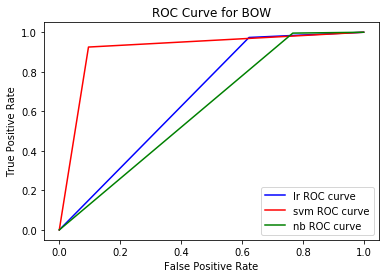

In [27]:
# create plot
plt.plot(fpr_lr, tpr_lr, label='lr ROC curve', c = 'b')
plt.plot(fpr_svm, tpr_svm, label='svm ROC curve', c = 'r')
plt.plot(fpr_nb, tpr_nb, label='nb ROC curve', c = 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BOW')
plt.legend(loc="lower right")

In [28]:
#precision recal curve lr
fpr_lr, tpr_lr,thresholds_lr = precision_recall_curve(sent_test, lr_pred)
#svm precision recal  curve
fpr_svm, tpr_svm, thresholds_svm = precision_recall_curve(sent_test, svm_pred)
#nb precision recal  curve
fpr_nb, tpr_nb, thresholds_nb = precision_recall_curve(sent_test, nb_pred)
#dt precision recal curve
#fpr_dt, tpr_dt, thresholds_dt = precision_recall_curve(sent_test, dt_pred)

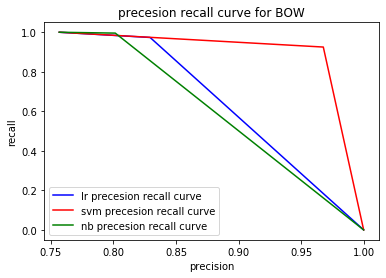

In [29]:
plt.plot(fpr_lr, tpr_lr, label='lr precesion recall curve', c = 'b')
plt.plot(fpr_svm, tpr_svm, label='svm precesion recall curve', c = 'r')
plt.plot(fpr_nb, tpr_nb, label='nb precesion recall curve', c = 'g')
#plt.plot(fpr_dt, tpr_dt, label='dt precesion recall curve', c = 'y')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precesion recall curve for BOW')
plt.legend(loc="lower left")

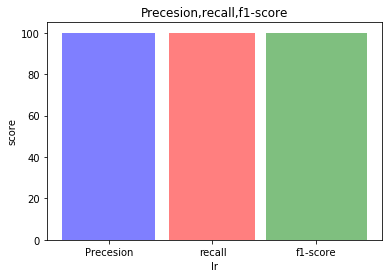

In [30]:
objects = ['Precesion','recall','f1-score']
y_pos = np.arange(len(objects))

plt.bar(y_pos,100, [lr_f1, lr_precision,lr_recall],color = ['b','r','g'] ,label= ['f1','precision','recall'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('lr')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()

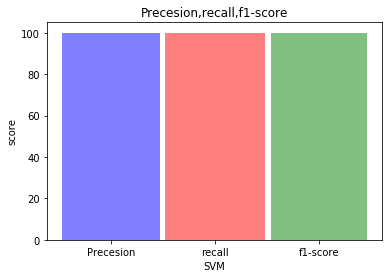

In [31]:
plt.bar(y_pos,100, [svm_f1, svm_precision,svm_recall],color = ['b','r','g'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('SVM')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()

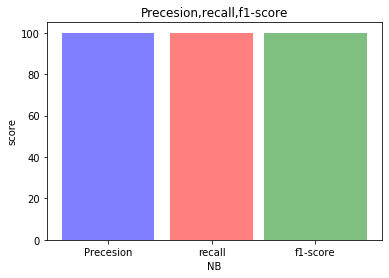

In [32]:
plt.bar(y_pos,100, [nb_f1, nb_precision,nb_recall],color = ['b','r','g'] ,alpha = 0.5)
plt.xticks(y_pos, objects)
plt.xlabel('NB')
plt.ylabel('score')
plt.title('Precesion,recall,f1-score')
plt.show()